<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

# Synthetic data: a Vertical Prism ( dike model )
### Compute the gravity attraction produced by a dike model (approximated by a vertical prism)
**Reference: Blakely (1996) - Potencial Theory in Gravity and Magnetic Aplications**

In [1]:
# Importing all usefull internal python libraries:
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
%matplotlib tk
#%matplotlib inline

In [2]:
# importing particular functions implemented by us:
from modules.prism import prism_gz
from modules.plots import draw_prism, rectangle
from modules.numerics import addnoise

In [3]:
# Positions and number of points
nx = 100
ny = 100
# to be used in the plot:
shape = (nx,ny)

# define the x and y ranges:
x = np.linspace(-5000., 5000.0, nx) # meters
y = np.copy(x) # for identical axis
#y = np.linspace(-3000.0, 3000.0, ny)
z = -500.0  #np.linspace(-20., -20.0, nx)  # meters (flight hight)

# Computes the mesh of all points
X, Y  = np.meshgrid(x, y)

In [14]:
# Setting the parameters for prism
# dike = [xmin, xmax, ymin, ymax, zmin, zmax, dens]
dike = [-1000., 1000., -500., 500., 500., 3000., 2900.0] # meters + kg/m3
# ---- define the plot area ---- :
area = dike[0:4]
view3D = dike[0:6]
print area
print view3D

[-1000.0, 1000.0, -500.0, 500.0]
[-1000.0, 1000.0, -500.0, 500.0, 500.0, 3000.0]


In [5]:
# create data frame with pandas to save data file:
columns=['xmin','xmax','ymin', 'ymax', 'zmin', 'zmax', 'density(kg/m3)']
datadike = pd.DataFrame( [dike], columns=columns)
datadike.to_csv("Synthetic/dike_model.txt", sep = ' ', index = False, header = True)

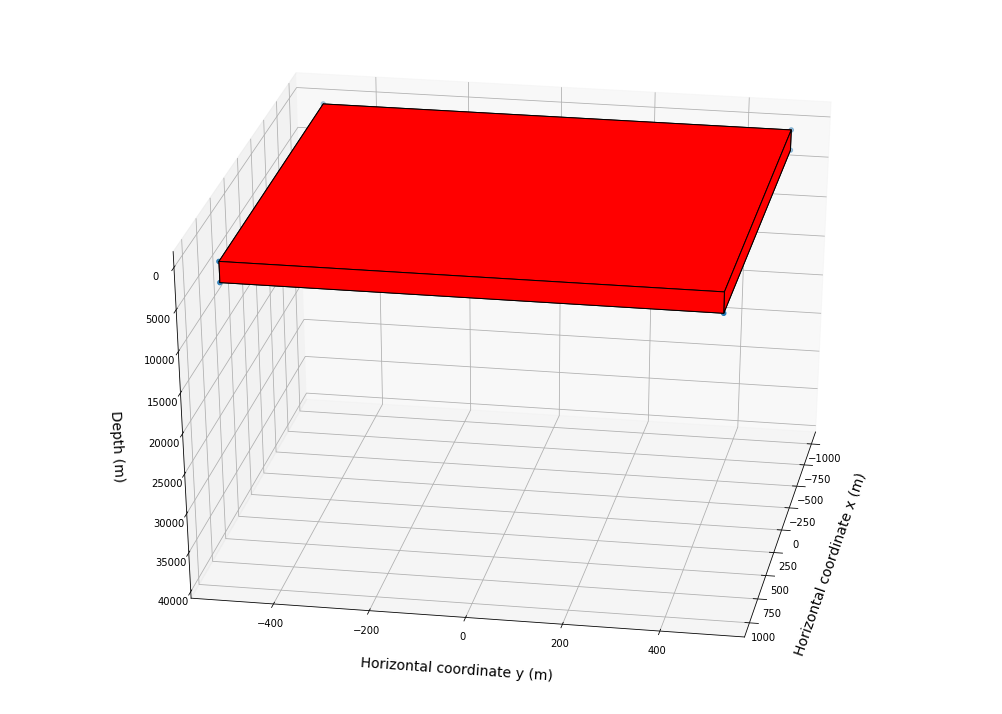

In [6]:
# make the 3D plot for visualization of the model:
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes
box = draw_prism(ax, dike)
# ----- labels (these should be used outside of the function!)
box.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=14)
box.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=14)
box.set_zlim(-1000,40000)
box.set_zlabel('Depth (m)',labelpad=20 ,fontsize=14, rotation = 90)

#visualization angle
box.view_init(30, 10)
box.invert_zaxis()
plt.tight_layout(True)

In [7]:
# Calculating the gravity components
gz = prism_gz(X, Y, z, dike)

In [8]:
# Adicionar ruido aos dados, visando simular a realidade das medidas:
gz_noise = addnoise(gz, 0.5, 0.1)

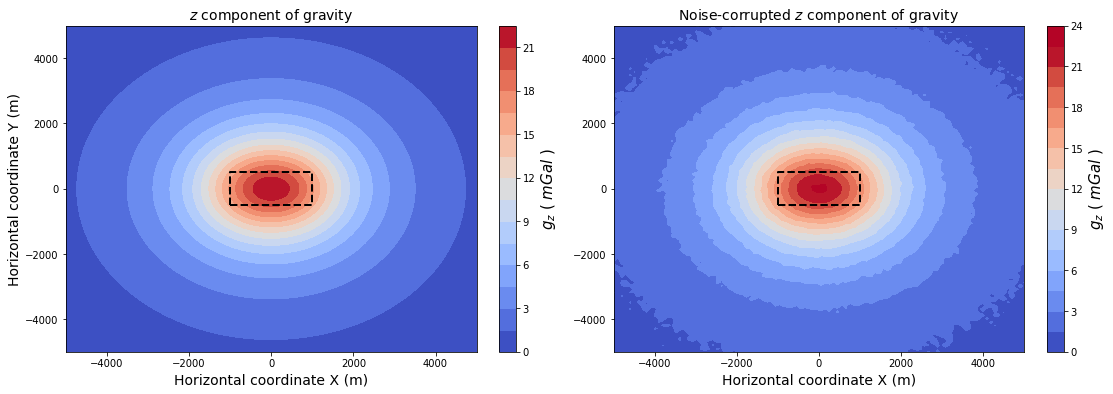

In [9]:
# Ploting all results obtained so far:
plt.close('all')
plt.figure(figsize=(18,6))
fs = 14
#############################################################################
plt.subplot(1, 2, 1)
plt.title('$z$ component of gravity ', fontsize = fs)
p1 = plt.contourf(X, Y, gz, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz), vmax = np.max(gz))
cbar = plt.colorbar(p1, aspect=20, fraction = 0.05, orientation="vertical")
cbar.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 90)
#plt.colorbar()
rectangle(area, style='--k', linewidth=2, fill= None, alpha=1., label=None)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
#############################################################################
plt.subplot(1, 2, 2)
plt.title('Noise-corrupted $z$ component of gravity ', fontsize = fs)
p2 = plt.contourf(X, Y, gz_noise, 20,cmap = plt.cm.coolwarm, vmin = np.min(gz), vmax = np.max(gz))
cbar = plt.colorbar(p2, aspect=20, fraction = 0.05, orientation="vertical")
cbar.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 90)
#plt.colorbar()
rectangle(area, style='--k', linewidth=2, fill= None, alpha=1., label=None)
#plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

#plt.savefig('figures/prism-gravity')

plt.show()

In [10]:
## escrevendo o arquivo com os dados:#
Xn = np.reshape(X, (nx*ny) )
Yn = np.reshape(Y, (nx*ny) )
GZ = np.reshape(gz_noise, (nx*ny) )
elev = np.linspace(z,z,nx*ny)

# create data frame with pandas to save data file:
columns=['X(m)','Y(m)','elev(m)', 'gz(mgal)']
data = np.transpose( (Xn, Yn, elev, GZ) )
data = pd.DataFrame(data, columns=columns)
#print data
data.to_csv("Synthetic/synthetic_data.txt", index=False, encoding='utf8', sep = ' ')

#  <center> 3D Plot of model and data in slice <center>

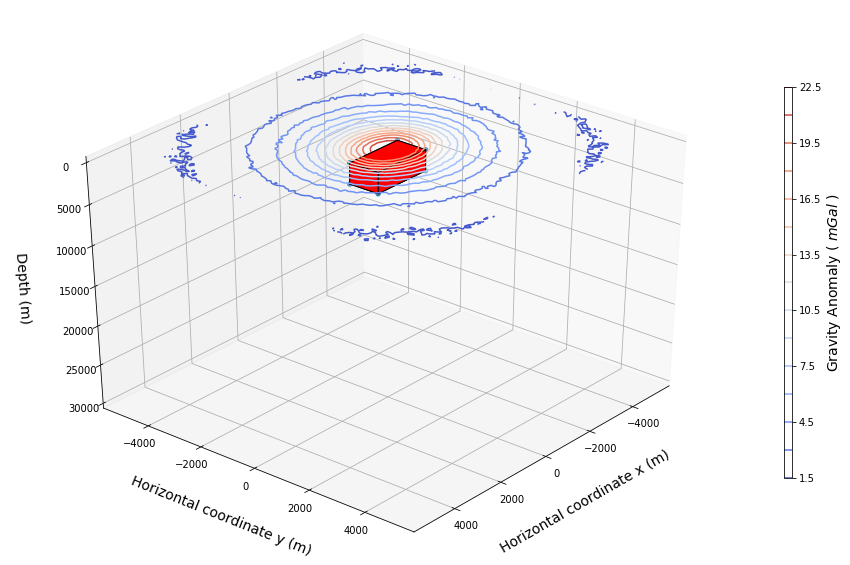

In [16]:
# make the 3D plot for visualization of the model:

#py.rcParams['contour.negative_linestyle'] = 'dashed'
plt.close('all')
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes

# plot the dike and store it in pbox plotting object:
pbox = draw_prism(ax, view3D)

# ----- define labels and limits of the plotbox:
pbox.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
pbox.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
pbox.set_zlim(-100,30000)
pbox.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)
pbox.view_init(35, 40)

# put z downward
pbox.invert_zaxis()

# ------------------- vertical gravitational atraction produced by the dike ------------------:
p1 = pbox.contour(X, Y, gz_noise, 20, zdir='z', 
                offset=z, cmap='coolwarm', vmin = np.min(gz_noise), vmax = np.max(gz_noise) )
cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar1.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)
plt.show()

In [ ]:
# <center> END OF THE SCRIPT THAT GENERATES SYNTHETIC GRAVITY DATA <center>